En esta parte del curso, analizamos cómo resolver ecuaciones diferenciales ordinarias (EDO). Si bien su resolución numérica no es el tema principal del curso, su estudio permite introducir conceptos muy importantes, esenciales para la resolución numérica de ecuaciones diferenciales parciales (EDP).

Las EDO que consideramos se pueden escribir en la forma:

$$y^{(n)}=f(t, y, \dots, y^{(n-1)}) $$

dónde $y=y(t)$ es una función de la variable $t$ y $y^{(n)}$, donde $n$ reopresenta la enesima derivada de $y$ con respecto a $t$.

$$y^{(n)}=\frac{d^ny}{dt^n}$$

Cuando $f$ no depende explícitamente del tiempo, calificamos el problema como autónomo. Tenga en cuenta que hemos utilizado a $t$ como variable independiente
y a $y$ como la variable dependiente.

Como ejemplo y problema de juguete, consideremos la desintegración radiactiva. Imaginemos que tenemos una muestra de material que contiene núcleos inestables en un tiempo inicial dado por $t_0$. La evolución temporal sigue una ley de decaimiento exponencial:

$$\frac{dN(t)}{dt}=-\alpha N(t)$$

dónde $\alpha > 0$, y es una constante que depende del tipo de núcleo presente en el material. Por supuesto, no necesitamos una computadora para resolver esta ecuación, ya que su solución es fácil de obtener y se lee:

$$N(t)=N(t_0)e^{-\alpha t}$$

Sin embargo, el objetivo aquí es obtener la evolución temporal anterior utilizando un esquema numérico.

In [1]:
import numpy as np

#  Forward Euler Method (Método de Euler Explicito)

In [24]:
alpha = 0.25 # Exponential law coefficient
ti = 0.0     # Initial time
tf = 5.0     # Final time
dt = 0.5     # Time step
Ni = 100     # Initial condition

In [25]:
nt = int((tf-ti)/dt)

N = np.empty(nt+1)

N[0] = Ni


for i in range(nt):
    N[i+1] = N[i] - alpha*N[i]*dt

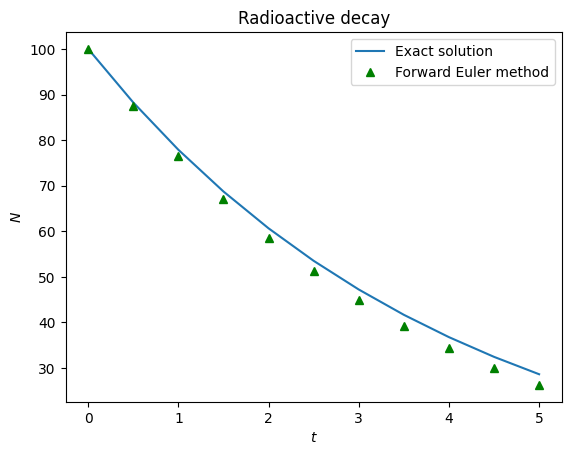

In [26]:
import matplotlib.pyplot as plt
%matplotlib inline

t = np.arange(nt+1) * dt

Nexact = Ni * np.exp(-alpha*t)

fig, ax = plt.subplots()

ax.plot(t, Nexact, linestyle='-', label='Exact solution')
ax.plot(t, N, '^', color='green', label='Forward Euler method')

ax.set_xlabel('$t$')
ax.set_ylabel('$N$')
ax.set_title('Radioactive decay')

ax.legend()

#fig.savefig('../figures/radioactiveDecay.png', dpi=300)

In [7]:
dt_list = np.array([0.5/2**k for k in range(5)])

values = np.empty_like(dt_list)

for i, dt in enumerate(dt_list):
    N = Ni
    nt = int((tf-ti)/dt)
    for j in range(nt):
        N = N - alpha*N*dt
    values[i] = N

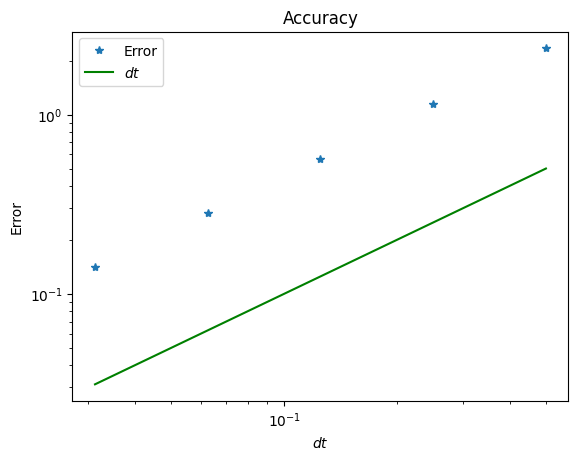

In [6]:
error = np.abs(values-Ni*np.exp(-alpha*tf))

fig, ax = plt.subplots()

ax.loglog(dt_list, error, '*', label='Error')

ax.loglog(dt_list, dt_list, color='green', label='$dt$')

ax.set_xlabel('$dt$')
ax.set_ylabel('Error')
ax.set_title('Accuracy')

ax.legend();

# fig.savefig('../figures/eulerSlope.png', dpi=300)

# Estabilidad Númerica del Método

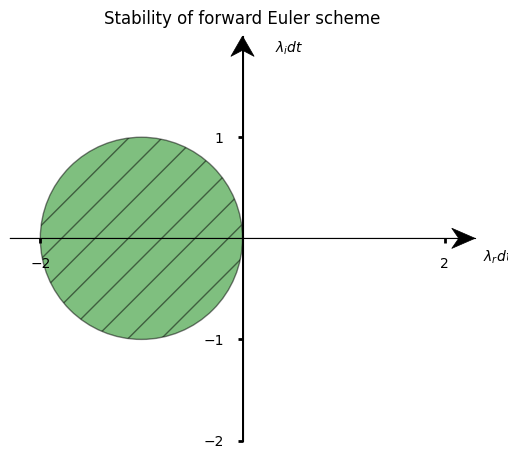

In [8]:
fig, ax = plt.subplots(figsize=(6, 6))

circle = plt.Circle((-1, 0), 1, ec='k', fc='green', alpha=0.5, hatch='/')

ax.add_artist(circle)

ax.set_aspect(1)

ax.spines['left'].set_position('center')
ax.spines['bottom'].set_position('center')

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

xmin, xmax = -2.3, 2.3
ymin, ymax = -2., 2.

ax.set_xlim(xmin ,xmax)
ax.set_ylim(ymin, ymax)

ax.arrow(xmin, 0., xmax-xmin, 0., fc='k', ec='k', lw=0.5,
         head_width=1./20.*(ymax-ymin), head_length=1./20.*(xmax-xmin),
         overhang = 0.3, length_includes_head= True, clip_on = False)

ax.arrow(0., ymin, 0., ymax-ymin, fc='k', ec='k', lw=0.5,
         head_width=1./20.*(xmax-xmin), head_length=1./20.*(ymax-ymin),
         overhang = 0.3, length_includes_head= True, clip_on = False)


ax.set_xlabel(r'$\lambda_r dt$')
ax.set_ylabel(r'$\lambda_i dt$', rotation=0)

ax.yaxis.set_label_coords(0.6, 0.95)
ax.xaxis.set_label_coords(1.05, 0.475)

ax.set_title('Stability of forward Euler scheme', y=1.01)

ax.set_xticks((-2, 2))
ax.set_yticks((-2, -1, 1))


ax.tick_params(width=2, pad=10)

# Ejemplo de orden superior

In [27]:
g = 9.81  # ms^-2, gravitational constant
h0 = 100. # initial height
v0 = 0.   # initial velocity

ti = 0.   # initial time
tf = 4.0  # final time at which to seek the solution
dt = 0.1  # time step

In [28]:
nt = int((tf-ti)/dt)

y = np.empty((nt+1, 2))

y[0] = h0, v0

b = np.array([0., -g])

L = np.array([[0., 1.], [0., 0.]])

for i in range(nt):
    y[i+1] = y[i] + np.dot(L, y[i])*dt + b*dt

Text(0.5, 1.0, 'Height vs time (m)')

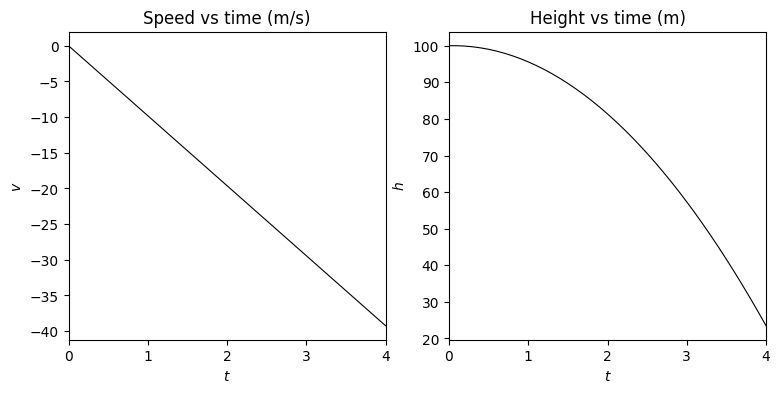

In [29]:
t = np.arange(nt+1) * dt

fig, ax = plt.subplots(1, 2, figsize=(9, 4))

ax[0].plot(t, y[:, 1], '-k', lw=0.8)
ax[0].set_xlim(t[0], t[-1])

ax[0].set_xlabel('$t$')
ax[0].set_ylabel('$v$')
ax[0].set_title('Speed vs time (m/s)')

ax[1].plot(t, y[:, 0], '-k', lw=0.8)

ax[1].set_xlim(t[0], t[-1])

ax[1].set_xlabel('$t$')
ax[1].set_ylabel('$h$')
ax[1].set_title('Height vs time (m)')

# Revisión de la estabilidad numérica del método de Euler Explicito en el Oscilador Armonico Simple

In [30]:
k = 2.    # spring constant
m = 1.    # object's mass
x0 = 0.75 # initial position
v0 = 0.   # initial velocity
ti = 0.   # initial time
tf = 40.0 # final time at which the solution is computed
dt = 0.15 # time step

In [31]:
gamma = np.sqrt(k/m)
nt = int((tf-ti)/dt)

y = np.empty((nt+1, 2))

y[0] = x0, v0

L = np.array([[0., 1.], [-gamma**2, 0.]])

for i in range(nt):
    y[i+1] = y[i] + np.dot(L, y[i])*dt

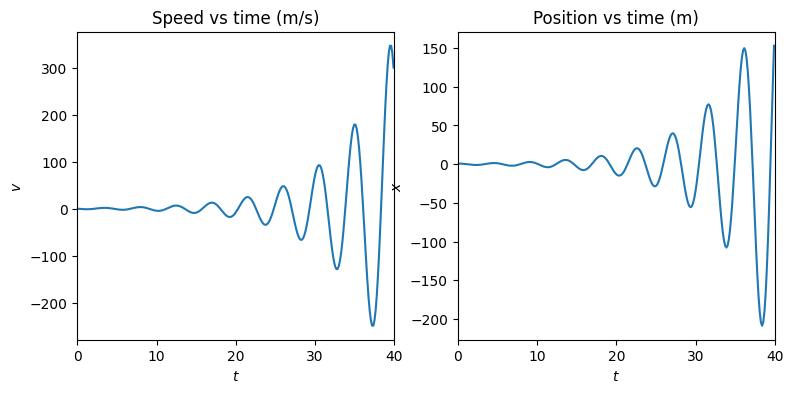

In [32]:
t = np.arange(nt+1) * dt

fig, ax = plt.subplots(1, 2, figsize=(9, 4))

ax[0].plot(t, y[:, 1])

ax[0].set_xlabel('$t$')
ax[0].set_ylabel('$v$')
ax[0].set_title('Speed vs time (m/s)')

ax[1].plot(t, y[:, 0])

ax[1].set_xlabel('$t$')
ax[1].set_ylabel('$x$')
ax[1].set_title('Position vs time (m)')

for axis in ax:
    axis.set_xlim(0, 40.)

# Método Implicito de Euler

In [33]:
alpha = 0.25 # Exponential law coeffecient
ti = 0.0     # Initial time
tf = 15.0    # Final time
dt = 1.      # Time step
Ni = 100     # Initial condition

In [34]:
nt = int((tf-ti)/dt)

N = np.empty((nt+1, 2))

N[0] = Ni, Ni

coef_imp = (1.+alpha*dt)**(-1)


for i in range(nt):
    N[i+1, 0] = N[i, 0] - alpha*N[i, 0]*dt

    N[i+1, 1] = coef_imp*N[i, 1]

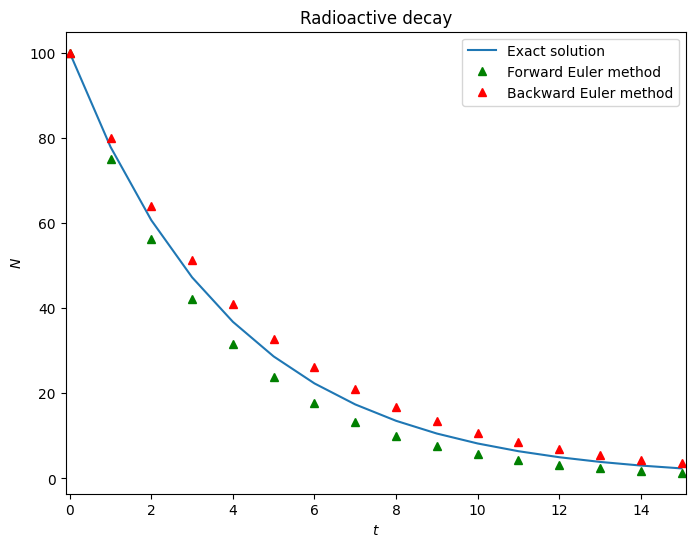

In [35]:
t = np.arange(nt+1) * dt

Nexact = Ni * np.exp(-alpha*t)


fig, ax = plt.subplots(figsize=(8, 6))

ax.plot(t, Nexact, label='Exact solution')

ax.plot(t, N[:, 0], '^', color='green', label='Forward Euler method')
ax.plot(t, N[:, 1], '^', color=(1., 0., 0.), label='Backward Euler method')

ax.set_xlim(t[0]-0.1, t[-1]+0.1)

ax.set_xlabel('$t$')
ax.set_ylabel('$N$')
ax.set_title('Radioactive decay')

ax.legend();

In [48]:
ti = 0.    # initial time
tf = 40.0  # final time at which the solution is computed
dt = 0.15  # time step

nt = int((tf-ti)/dt)

t = np.arange(nt+1) * dt

In [49]:
y_imp = np.empty((nt+1, 2))

y_imp[0] = x0, v0

L_imp = np.linalg.inv(np.array([[1., -dt], [gamma**2*dt, 1.]]))


for i in range(nt):
    y_imp[i+1] = np.dot(L_imp, y_imp[i])

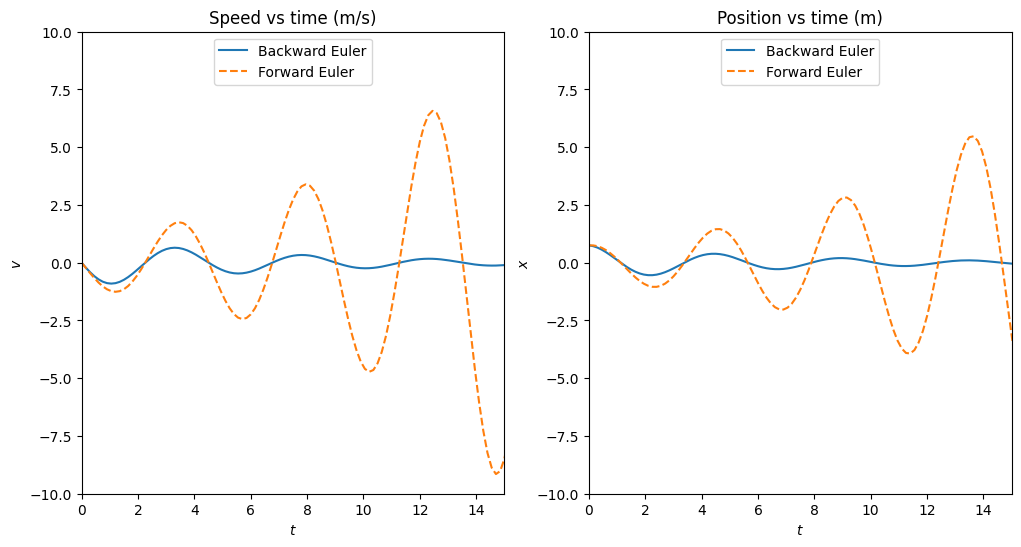

In [50]:
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

ax[0].plot(t, y_imp[:, 1], label='Backward Euler')
ax[0].plot(t, y[:, 1], '--', label='Forward Euler')

ax[0].set_xlabel('$t$')
ax[0].set_ylabel('$v$')
ax[0].set_title('Speed vs time (m/s)')

ax[1].plot(t, y_imp[:, 0], label='Backward Euler')
ax[1].plot(t, y[:, 0], '--', label='Forward Euler')

ax[1].set_xlabel('$t$')
ax[1].set_ylabel('$x$')
ax[1].set_title('Position vs time (m)')

for axis in ax:
    axis.set_xlim(0, 15)
    axis.set_ylim(-10, 10)
    axis.legend(loc='upper center')